In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from haversine import haversine, Unit
import geopandas as gpd
from pyproj import Proj, transform
import contextily as ctx
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import pacf,acf
pd.set_option('display.max_columns', None)

In [126]:
meteo_df = pd.read_pickle(os.path.join('..','data','processed','meteo_processed.pkl'),compression='zip')
meteo_df = meteo_df.iloc[2:]
meteo_df = meteo_df.set_index('date')

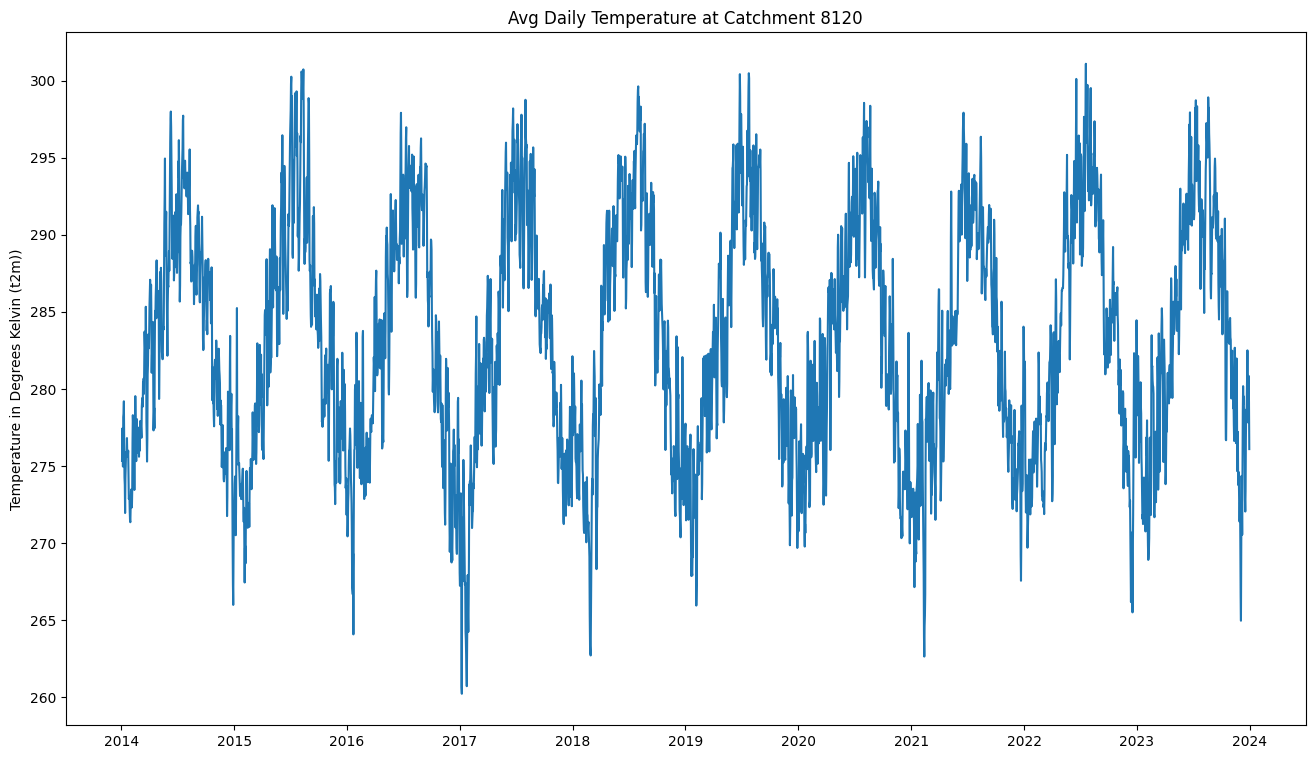

In [127]:
plt.figure(figsize=(16,9))
plt.plot(meteo_df['t2m_8120'])
plt.ylabel('Temperature in Degrees Kelvin (t2m))')
plt.title('Avg Daily Temperature at Catchment 8120')
plt.show()

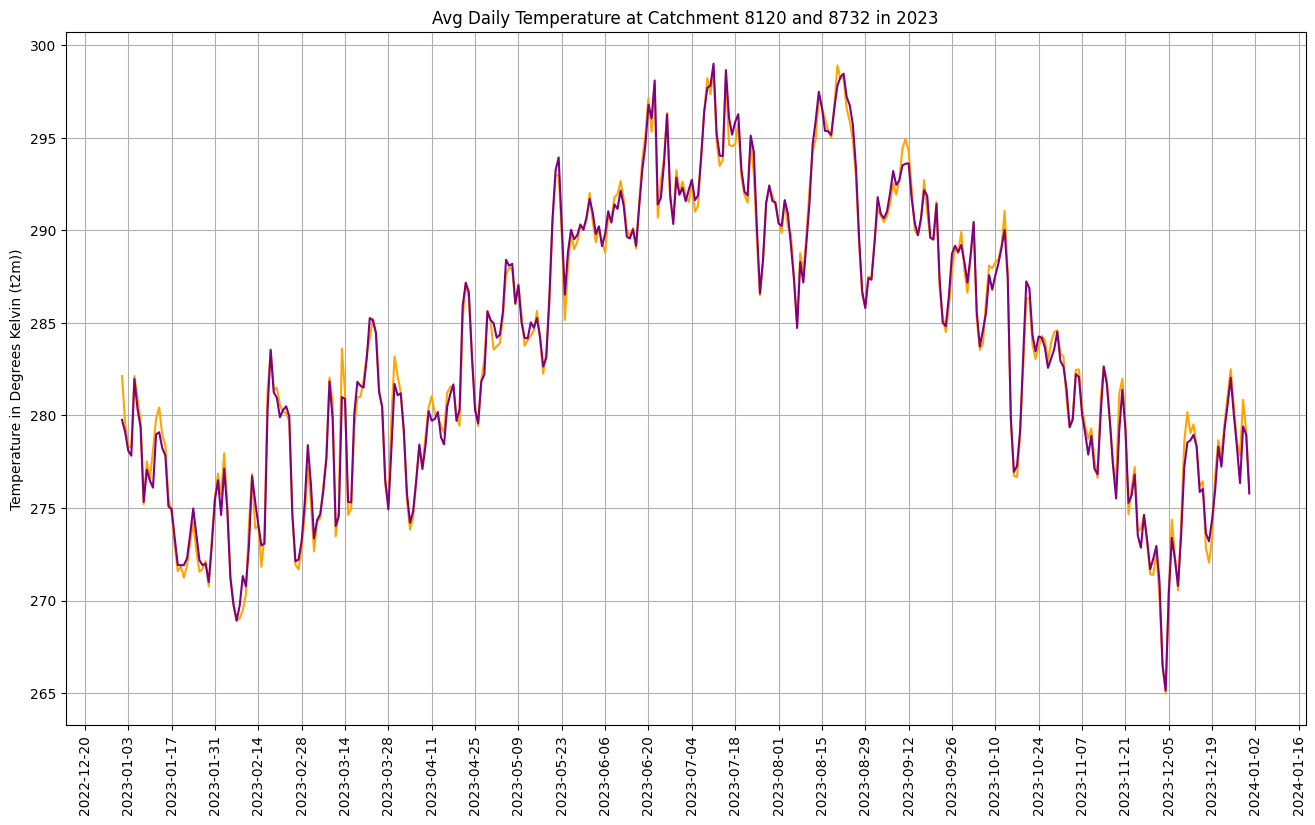

In [128]:
import matplotlib.dates as mdates

plt.figure(figsize=(16,9))
plt.plot(meteo_df['t2m_8120']['2023'],color = 'orange')
plt.plot(meteo_df['t2m_8732']['2023'],color = 'purple')
plt.ylabel('Temperature in Degrees Kelvin (t2m))')
plt.title('Avg Daily Temperature at Catchment 8120 and 8732 in 2023')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.grid(True)
plt.xticks(rotation =90)
plt.show()

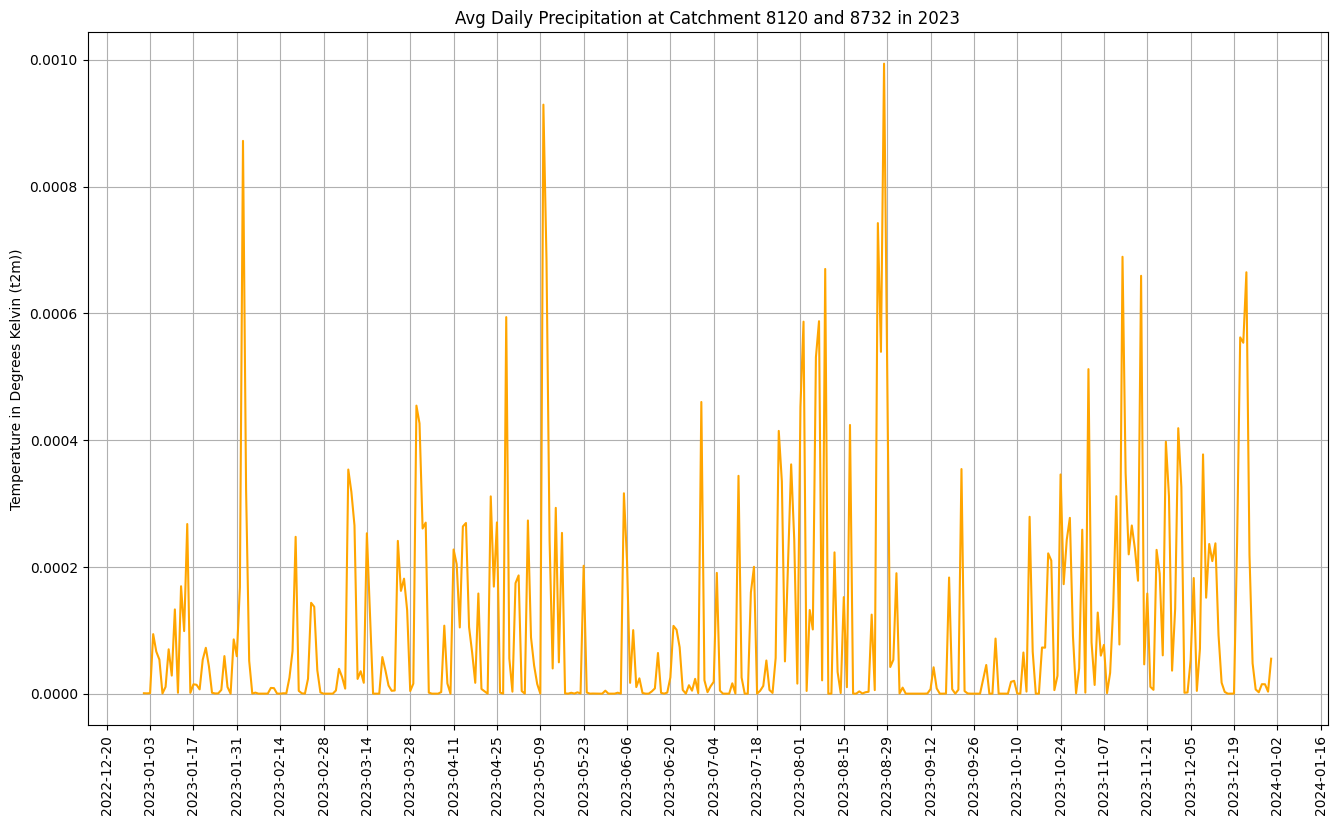

In [129]:
plt.figure(figsize=(16,9))
plt.plot(meteo_df['tp_8120']['2023'],color = 'orange')
# plt.plot(meteo_df['t2m_8732']['2023'],color = 'purple')
plt.ylabel('Temperature in Degrees Kelvin (t2m))')
plt.title('Avg Daily Precipitation at Catchment 8120 and 8732 in 2023')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.grid(True)
plt.xticks(rotation =90)
plt.show()

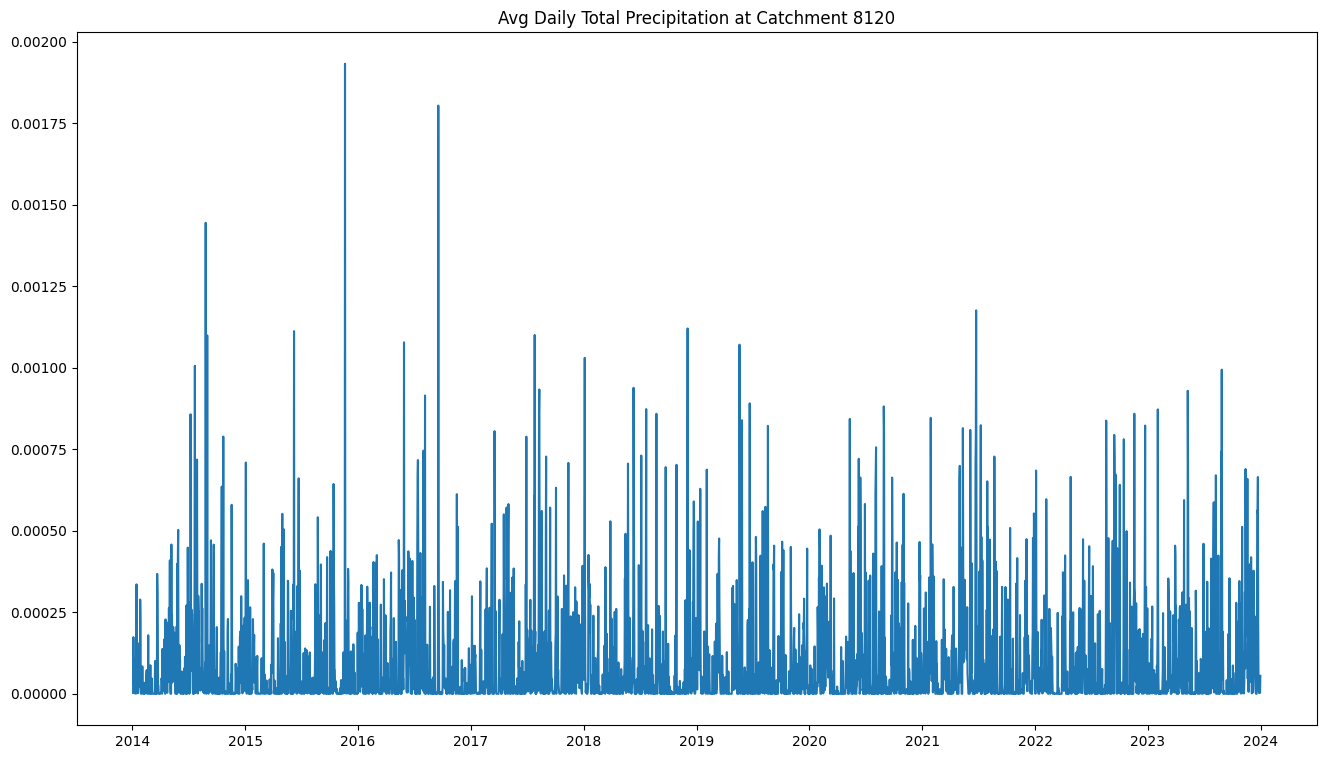

In [141]:
plt.figure(figsize=(16, 9))
plt.title('Avg Daily Total Precipitation at Catchment 8120')
plt.plot(meteo_df['tp_8120'])

(array([2.132e+03, 3.620e+02, 2.100e+02, 1.760e+02, 1.500e+02, 1.070e+02,
        1.060e+02, 6.200e+01, 7.000e+01, 5.200e+01, 3.500e+01, 3.800e+01,
        2.300e+01, 2.000e+01, 1.400e+01, 1.200e+01, 8.000e+00, 1.600e+01,
        1.300e+01, 3.000e+00, 8.000e+00, 8.000e+00, 7.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-8.67361738e-19,  3.86367854e-05,  7.72735709e-05,  1.15910356e-04,
         1.54547142e-04,  1.93183927e-04,  2.31820713e-04,  2.70457498e-04,
         3.09094283e-04,  3.47731069e-04,  3.86367854e-04,  4.25004640e-04,
         4.63641425e-04,  5.02278211e-04,  5.40914996e-04,  5.79551782e-04,
         6.18188567e-04,  6.56825352e-04,  6.95462138e-04,  7.34098923e-

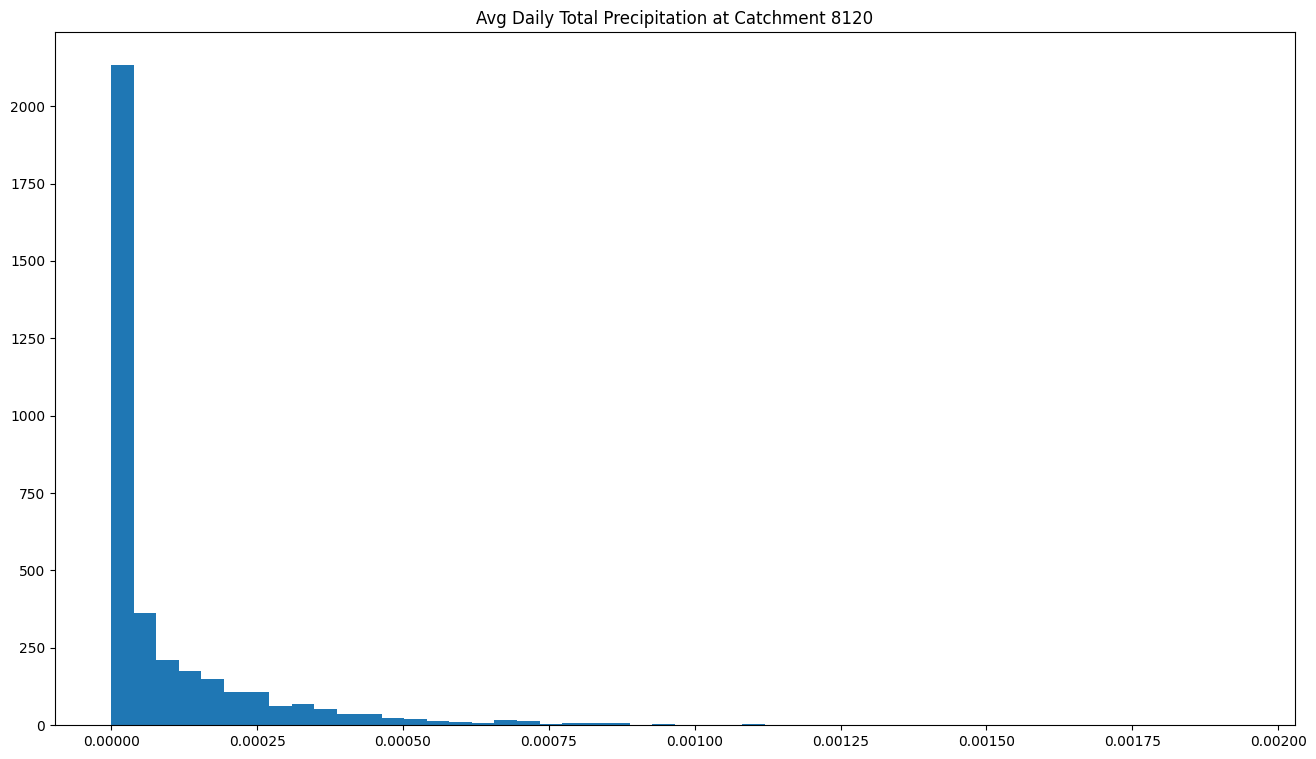

In [143]:
plt.figure(figsize=(16, 9))
plt.title('Avg Daily Total Precipitation at Catchment 8120')
plt.hist(meteo_df['tp_8120'],bins = 50)

<Axes: >

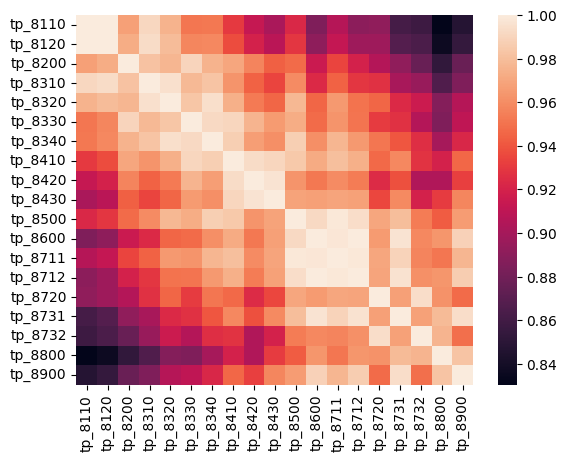

In [131]:
sns.heatmap(meteo_df[[col for col in meteo_df.columns if 'tp' in col]].corr())

<Axes: >

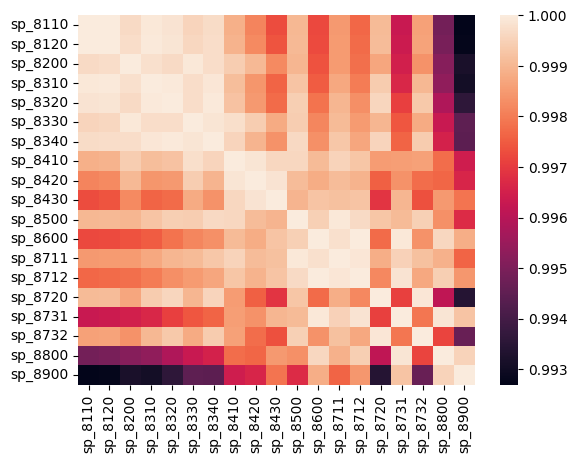

In [133]:
sns.heatmap(meteo_df[[col for col in meteo_df.columns if 'sp' in col]].corr())

In [116]:
catch_path = os.path.join('..','data/raw/catchments')
polygons = gpd.read_file(os.path.join(catch_path,'regen_catchments_right.shp'))
polygons['catch_name'] = polygons['PFAF_ID'].apply(lambda row: int(str(row)[-4:]))
polygons.head()

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,catch_name
0,2111140970,2111140930,2110008490,2110008490,2620.0,2620.0,174.3,174.4,22799308430,0,0,3,19896,"POLYGON ((12.89167 49.25000, 12.89202 49.25242...",8430
1,2111140930,2110448780,2110008490,2110008490,2612.4,2612.4,108.0,282.4,22799308420,0,0,3,19882,"POLYGON ((12.86250 49.24167, 12.85925 49.24243...",8420
2,2110449380,2111142630,2110008490,2110008490,2560.0,2560.0,120.2,120.3,22799308200,0,0,3,19769,"POLYGON ((12.40417 49.25833, 12.40328 49.25488...",8200
3,2111141680,2111142150,2110008490,2110008490,2580.7,2580.7,93.6,2117.8,22799308330,0,0,2,19814,"POLYGON ((12.55000 49.19167, 12.54668 49.19252...",8330
4,2110448780,2111141690,2110008490,2110008490,2596.9,2596.9,131.5,413.9,22799308410,0,0,3,19845,"POLYGON ((12.70833 49.31667, 12.70798 49.32742...",8410


In [117]:
polygons.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   HYBAS_ID    19 non-null     int64   
 1   NEXT_DOWN   19 non-null     int64   
 2   NEXT_SINK   19 non-null     int64   
 3   MAIN_BAS    19 non-null     int64   
 4   DIST_SINK   19 non-null     float64 
 5   DIST_MAIN   19 non-null     float64 
 6   SUB_AREA    19 non-null     float64 
 7   UP_AREA     19 non-null     float64 
 8   PFAF_ID     19 non-null     int64   
 9   ENDO        19 non-null     int64   
 10  COAST       19 non-null     int64   
 11  ORDER       19 non-null     int64   
 12  SORT        19 non-null     int64   
 13  geometry    19 non-null     geometry
 14  catch_name  19 non-null     int64   
dtypes: float64(4), geometry(1), int64(10)
memory usage: 2.4 KB


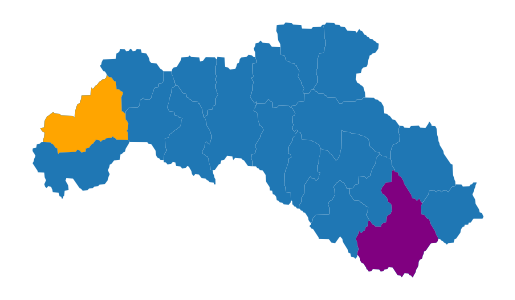

In [118]:
# Plotting
fig, ax = plt.subplots()

# Plot all geometries in blue
polygons.plot(ax=ax)

# Plot the highlighted geometry in orange
polygons[polygons['catch_name'] == 8120].plot(ax=ax, color='orange')
polygons[polygons['catch_name'] == 8732].plot(ax=ax, color='purple')
ax.set_axis_off()
plt.show()

In [119]:
def mean_meteo(df : pd.DataFrame,meteo : str):
    in_df = df.copy()[[col for col in df.columns if meteo in col]]
    return in_df.mean(axis = 1)

In [120]:
meteo = meteo_df.copy()
meteo_vars = ['t2m','tp','ssr','d2m','sp']

for var in meteo_vars:
    meteo[f"mean_{var}"] = mean_meteo(meteo,var)

tp_to_drop = [col for col in meteo.columns if 'tp_' in col]
d2m_to_drop = [col for col in meteo.columns if 'd2m_' in col]
ssr_to_drop = [col for col in meteo.columns if 'ssr_' in col]
t2m_to_drop = [col for col in meteo.columns if 't2m_' in col]
sp_tp_drop = [col for col in meteo.columns if 'sp_' in col]
cols_to_drop = tp_to_drop + d2m_to_drop + ssr_to_drop + t2m_to_drop + sp_tp_drop
meteo = meteo.drop(columns = cols_to_drop)
meteo[['mean_t2m','mean_tp','mean_ssr','mean_d2m','mean_sp']] = meteo[['mean_t2m','mean_tp','mean_ssr','mean_d2m','mean_sp']].rolling(3).mean()
meteo = meteo.dropna()
meteo.head()

,mean_t2m,mean_tp,mean_ssr,mean_d2m,mean_sp
date,,,,,
2014-01-09,276.352496,0.000048,124894.639768,274.850063,95494.297074
2014-01-10,276.744579,0.000034,142424.599276,275.109241,95698.318851
2014-01-11,277.042693,0.000038,151443.438791,275.274569,95787.381731
2014-01-12,276.830514,0.000058,151147.925429,275.047371,95807.529901
2014-01-13,275.966849,0.000070,146554.020893,274.321994,95799.864109


<Axes: >

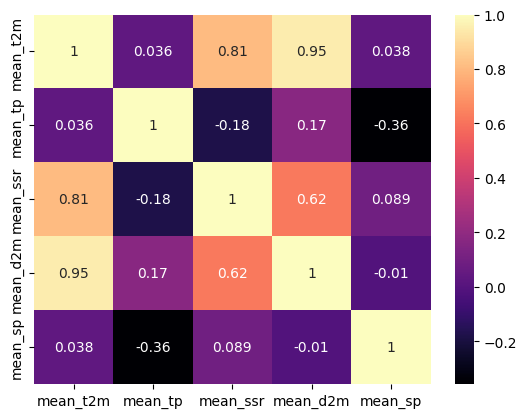

In [124]:
sns.heatmap(meteo.corr(),cmap='magma',annot = True)
